In [ ]:
!pip install ordpy

In [ ]:
!pip install --force-reinstal git+https://github.com/rsautter/eta/

  Cloning https://github.com/rsautter/eta/ to /tmp/pip-req-build-xxlxzdpk
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/eta/ /tmp/pip-req-build-xxlxzdpk
  Resolved https://github.com/rsautter/eta/ to commit 646edf46def9dfc9d10fb81bf9c934eeb3ae689d
  Preparing metadata (setup.py) ... done
  Created wheel for Eta: filename=Eta-0.1-py3-none-any.whl size=15118 sha256=b529d49ca3805e21911b10266e009321714fd3a120e58ae928d02acf58e8ad7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-8rgnjnfc/wheels/be/e5/6a/f34013f615a3379f8419799e352c823927e6d8decfebf50307
Successfully built Eta


In [ ]:
!pip install git+https://github.com/rsautter/gpa/

  Cloning https://github.com/rsautter/gpa/ to /tmp/pip-req-build-ltte8kxo
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/gpa/ /tmp/pip-req-build-ltte8kxo
  Resolved https://github.com/rsautter/gpa/ to commit 2c011bb317699305375b9847baf7a6f4509c0b4c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for GPA: filename=GPA-3.5-cp310-cp310-linux_x86_64.whl size=1514510 sha256=93f52c64b3ea17c497a41fd9245607aadc817721f24d9baf99a2a57f7f8f0a0f
  Stored in directory: /tmp/pip-ephem-wheel-cache-46xqmlxh/wheels/cf/d3/01/6bc4b9ee1b7099c44ec5622ba091557ebb46215dac6ed99069
Successfully built GPA


In [ ]:
!pip install --force-reinstall git+https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau

  Cloning https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau to /tmp/pip-req-build-y6y17m9n
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau /tmp/pip-req-build-y6y17m9n
  Resolved https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau to commit 98d6a3a85e19e5c0e80d41e297dec6afd4a18d69
  Preparing metadata (setup.py) ... done
  Created wheel for NCGL: filename=NCGL-0.1-py3-none-any.whl size=18849 sha256=da4f002c1d31c4543ad1160278af662711d89a04c1c797f141c1917d9905a8fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-eboherk3/wheels/bc/92/12/b3ad30c00cc629588178c0455936a8ec81bc775213bae2bb70
Successfully built NCGL


In [ ]:
!pip install mechanize
!pip install git+https://github.com/rsautter/MillenniumQuery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 2.8 MB/s eta 0:00:00
  Cloning https://github.com/rsautter/MillenniumQuery to /tmp/pip-req-build-57lv6tca
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/MillenniumQuery /tmp/pip-req-build-57lv6tca
  Resolved https://github.com/rsautter/MillenniumQuery to commit c5cee6205c9f183f7b03582a4dfcf0c71a17252e
  Preparing metadata (setup.py) ... done
  Created wheel for millennium: filename=millennium-0.1-py3-none-any.whl size=2007 sha256=5f6c25538f2a0e5724d48c62b5e71ab90c41f1b28954412bb666247d693f24a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-06duisj2/wheels/ec/64/79/e7f19e07ef44e58a1e36abe2801330782b025012c12fac3837
Successfully built millennium


In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import cv2
from ordpy import *
from GPA import GPA
import NCGL
import eta
import tqdm
from  matplotlib.gridspec import GridSpec
import seaborn as sns
from millennium import queryMillennium

# Pencil

In [ ]:
!gdown 1X5aOr5kQm6NpdSLiTVWt-Fwm-ttwQfTL

Downloading...
From: https://drive.google.com/uc?id=1X5aOr5kQm6NpdSLiTVWt-Fwm-ttwQfTL
To: /content/simulaturb_Erico_Rempel_ITA.zip
100% 1.69M/1.69M [00:00<00:00, 12.4MB/s]


In [ ]:
!unzip  simulaturb_Erico_Rempel_ITA.zip

Archive:  simulaturb_Erico_Rempel_ITA.zip
  inflating: ux_1.dat                
  inflating: ux_2.dat                
  inflating: ux_3.dat                
  inflating: ux_4.dat                
  inflating: ux_5.dat                
  inflating: ux_6.dat                
  inflating: ux_7.dat                
  inflating: ux_8.dat                
  inflating: ux_9.dat                
  inflating: ux_10.dat               
  inflating: ux_11.dat               
  inflating: ux_12.dat               
  inflating: ux_13.dat               
  inflating: ux_14.dat               
  inflating: ux_15.dat               
  inflating: ux_16.dat               
  inflating: ux_17.dat               
  inflating: ux_18.dat               
  inflating: ux_19.dat               
  inflating: ux_20.dat               
  inflating: ux_21.dat               
  inflating: ux_22.dat               
  inflating: ux_23.dat               
  inflating: ux_24.dat               
  inflating: ux_25.dat               
  inflat

In [ ]:
def readMod(i):
  dx = pd.read_csv(f'ux_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  dy = pd.read_csv(f'uy_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  dz = pd.read_csv(f'uz_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  return np.sqrt(dx**2+dy**2+dz**2)

_='''
for i in range(1,26):
  plt.figure()
  plt.imshow(readMod(i),cmap='Reds')
  plt.colorbar()
plt.show()
'''


# Complex Ginzburg-Landau - 2D

In [ ]:
#gl = NCGL.NCGL(c1=0.0,msize=64,sigma_r=0.0,dim=2)

In [ ]:
#snap,times = gl.solveRKF45(dt=0.05,ntimes=3000,stepsave=np.arange(3000))

In [ ]:
#plt.figure()
#plt.imshow(snap[-50].real)
#plt.show()

# CGL 3D

In [ ]:
!gdown 1cRD0YnSjWPjFxj7OtDTR_ahlYvdqt20k

Downloading...
From: https://drive.google.com/uc?id=1cRD0YnSjWPjFxj7OtDTR_ahlYvdqt20k
To: /content/data.zip
100% 22.9M/22.9M [00:00<00:00, 26.0MB/s]


In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/s27.txt            
  inflating: data/s0.txt             
  inflating: data/s1.txt             
  inflating: data/s2.txt             
  inflating: data/s3.txt             
  inflating: data/s4.txt             
  inflating: data/s5.txt             
  inflating: data/s6.txt             
  inflating: data/s7.txt             
  inflating: data/s8.txt             
  inflating: data/s9.txt             
  inflating: data/s10.txt            
  inflating: data/s11.txt            
  inflating: data/s12.txt            
  inflating: data/s13.txt            
  inflating: data/s14.txt            
  inflating: data/s15.txt            
  inflating: data/s16.txt            
  inflating: data/s17.txt            
  inflating: data/s18.txt            
  inflating: data/s19.txt            
  inflating: data/s20.txt            
  inflating: data/s21.txt            
  inflating: data/s22.txt            
  inflating: data/s23.txt            
  inflating:

In [ ]:
pd.read_csv(f'data/s1.txt', header=None, delimiter='\s+').to_numpy()

array([[-0.65814411, -0.77812573, -0.83522405, ...,  0.0176062 ,
        -0.22200656, -0.4659533 ],
       [-0.38016939, -0.56805707, -0.70437481, ...,  0.18281863,
         0.04596724, -0.16035958],
       [-0.05862919, -0.26248288, -0.44971771, ...,  0.24058603,
         0.23399293,  0.12239672],
       ...,
       [-0.63217321, -0.43263468, -0.24488274, ..., -0.65655128,
        -0.80384164, -0.77979473],
       [-0.79946493, -0.70767525, -0.59021288, ..., -0.4694801 ,
        -0.70958126, -0.81553244],
       [-0.81143454, -0.831112  , -0.79905361, ..., -0.22264689,
        -0.50080072, -0.70644108]])

In [ ]:
snap = []
for i in range(500):
  snap.append(pd.read_csv(f'data/s{i}.txt', header=None, delimiter='\s+').to_numpy())

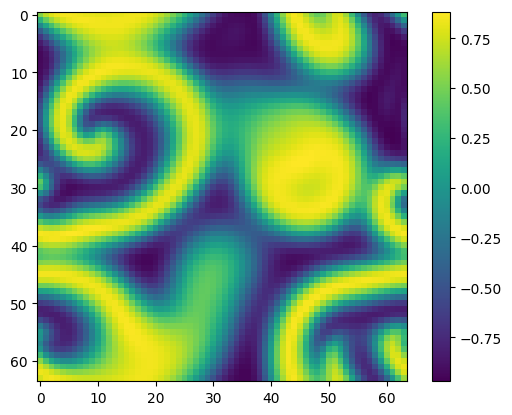

In [ ]:
plt.figure()
plt.imshow(snap[-30])
plt.colorbar()
plt.show()

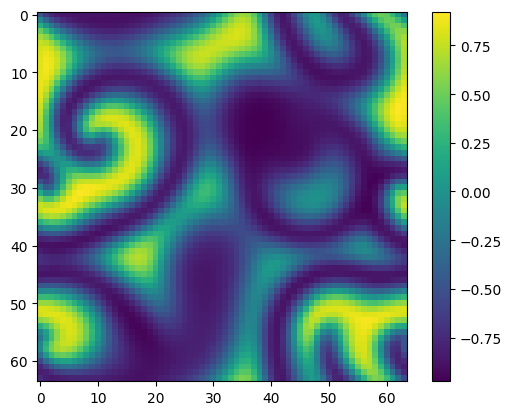

In [ ]:
plt.figure()
plt.imshow(snap[-490])
plt.colorbar()
plt.show()

# Camelia

In [ ]:
!gdown 11StegUWdxtaABUPngcQScwiIp82GxLJg
!gdown 1LyhQhxQekk2OTeBEZdZdZTz8zU5ZQVy7
!gdown 1ZBevXR1v8VLjjP1qQyyTtMq64KKK1azs

Downloading...
From: https://drive.google.com/uc?id=11StegUWdxtaABUPngcQScwiIp82GxLJg
To: /content/Camelia-BSW40.png
100% 434k/434k [00:00<00:00, 4.70MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LyhQhxQekk2OTeBEZdZdZTz8zU5ZQVy7
To: /content/Camelia-BSW20.png
100% 365k/365k [00:00<00:00, 4.19MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZBevXR1v8VLjjP1qQyyTtMq64KKK1azs
To: /content/Camelia-BSW1.png
100% 421k/421k [00:00<00:00, 4.68MB/s]


In [ ]:
camelia = []
camelia.append(cv2.resize(cv2.imread("Camelia-BSW40.png",cv2.IMREAD_GRAYSCALE),(64,64))/255)
camelia.append(cv2.resize(cv2.imread("Camelia-BSW20.png",cv2.IMREAD_GRAYSCALE),(64,64))/255)
camelia.append(cv2.resize(cv2.imread("Camelia-BSW1.png",cv2.IMREAD_GRAYSCALE),(64,64))/255)

# Pluto

In [ ]:
!gdown 1rK28XoVslT2NNCSNbENxKc9ZLmarHsvL
!gdown 1TT_7BX1ycY7IcDFHoJN-M3rNoYcgbhvk
!gdown 1rtbtmo3Qa1Q2mVRHeRnlkBtB22AL1D_f

Downloading...
From: https://drive.google.com/uc?id=1rK28XoVslT2NNCSNbENxKc9ZLmarHsvL
To: /content/dysunMHD2.png
100% 489k/489k [00:00<00:00, 5.19MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TT_7BX1ycY7IcDFHoJN-M3rNoYcgbhvk
To: /content/dysunMHD21.png
100% 280k/280k [00:00<00:00, 3.72MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rtbtmo3Qa1Q2mVRHeRnlkBtB22AL1D_f
To: /content/dysunMHD11.png
100% 250k/250k [00:00<00:00, 3.47MB/s]


In [ ]:
pluto = []
pluto.append(cv2.resize(cv2.imread("dysunMHD2.png",cv2.IMREAD_GRAYSCALE),(64,64) )/255)
pluto.append(cv2.resize(cv2.imread("dysunMHD21.png",cv2.IMREAD_GRAYSCALE),(64,64))/255)
pluto.append(cv2.resize(cv2.imread("dysunMHD11.png",cv2.IMREAD_GRAYSCALE),(64,64))/255)

-1.4491449211418677


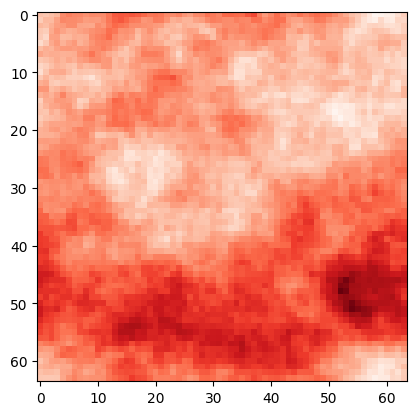

In [ ]:
m = NCGL.cNoise(2,[64,64])
print(eta.entropy(m)["Spectral_PowerlawTsallis"])
plt.figure()
plt.imshow(m,cmap='Reds')

#plt.colorbar()
plt.show()

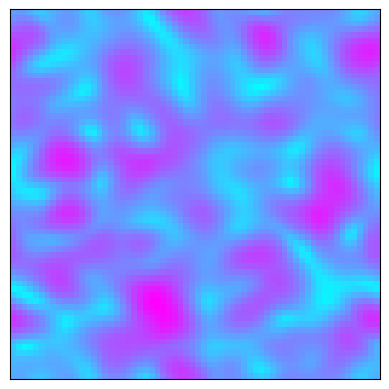

In [ ]:
plt.figure()
plt.imshow(readMod(5),cmap='cool')

plt.xticks([])
plt.yticks([])
plt.show()

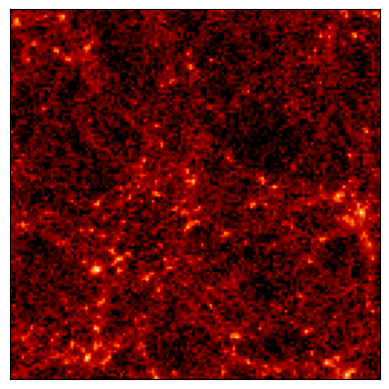

In [ ]:
plt.figure()
data = queryMillennium(snapnum=63)
img,_,_ = np.histogram2d(data['x'],data['y'],bins=128)
img = np.log(img+1)
plt.imshow(img,cmap='gist_heat')

plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
def plTsallis(p,qs=None,eps=None,returnQH=False):
  ts = []
  qsi = np.linspace(1,5,100) if qs is None else qs
  epsi = 1e-4 if eps is None else eps
  for q in qsi:
    ts.append(eta.tsallis(p,q,eps))
  alpha,  _ = np.polyfit(np.log(qsi),np.log(ts),deg=1)
  if not(returnQH):
    return alpha
  else:
    return alpha, np.log(qsi),np.log(np.array(ts))

-1.9089387831480824
-1.9059996848265803


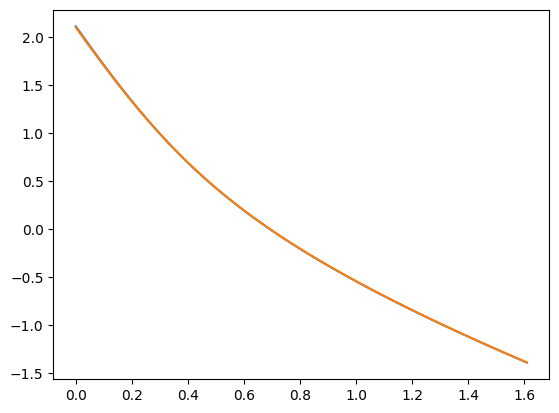

In [ ]:
pl,q,h = plTsallis(eta.getPermutationProb(snap[-500]),returnQH=True)
print(pl)
plt.figure()
plt.plot(q,h)
pl,q,h = plTsallis(eta.getPermutationProb(m),returnQH=True)
print(pl)
plt.plot(q,h)
#print(np.polyfit(np.exp(q),np.exp(h),deg=1))
plt.show()

# Analysis

In [ ]:
ga = GPA(0.0)

In [ ]:
cglH =[]
for i in tqdm.tqdm(range(25)):
  s = np.real(snap[-i])
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$\Re_(G4)$'] = np.real(gpaRes['G4'])
  d['$\Im_(G4)$']  = np.imag(gpaRes['G4'])
  cglH.append(d)
cglH = pd.DataFrame(cglH)

100%|██████████| 25/25 [00:03<00:00,  8.05it/s]


In [ ]:
turbH = []
for i in range(1,26):
  s = readMod(i)
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$\Re_(G4)$'] = np.real(gpaRes['G4'])
  d['$\Im_(G4)$']  = np.imag(gpaRes['G4'])
  turbH.append(d)
turbH = pd.DataFrame(turbH)

In [ ]:
randomH = []
for i in range(25):
  s = NCGL.cNoise(0,[64,64])
  d = eta.entropy(s)

  gpaRes = ga(s,moment=['G4'])
  d['$\Re_(G4)$'] = np.real(gpaRes['G4'])
  d['$\Im_(G4)$']  = np.imag(gpaRes['G4'])
  randomH.append(d)
randomH = pd.DataFrame(randomH)

In [ ]:
redNoiseH = []
for i in range(25):
  s = NCGL.cNoise(2,[64,64])
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$\Re_(G4)$'] = np.real(gpaRes['G4'])
  d['$\Im_(G4)$']  = np.imag(gpaRes['G4'])
  redNoiseH.append(d)
redNoiseH = pd.DataFrame(redNoiseH)

In [ ]:
cameliaH = []
for i in range(len(camelia)):
  s = camelia[i]
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$\Re_(G4)$'] = np.real(gpaRes['G4'])
  d['$\Im_(G4)$']  = np.imag(gpaRes['G4'])
  cameliaH.append(d)
cameliaH = pd.DataFrame(cameliaH)

In [ ]:
plutoH = []
for i in range(len(pluto)):
  s = pluto[i]
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$\Re_(G4)$'] = np.real(gpaRes['G4'])
  d['$\Im_(G4)$']  = np.imag(gpaRes['G4'])
  plutoH.append(d)
plutoH = pd.DataFrame(plutoH)

In [ ]:
mil = []
for i in tqdm.tqdm(range(32,64)):
  data = queryMillennium(snapnum=i)
  img,_,_ = np.histogram2d(data['x'],data['y'],bins=64)
  #img = np.log(img+1)
  d = eta.entropy(img)
  gpaRes = ga(img,moment=['G4'])
  d['$\Re_(G4)$'] = np.real(gpaRes['G4'])
  d['$\Im_(G4)$']  = np.imag(gpaRes['G4'])
  mil.append(d)
mil = pd.DataFrame(mil)

100%|██████████| 32/32 [01:28<00:00,  2.76s/it]


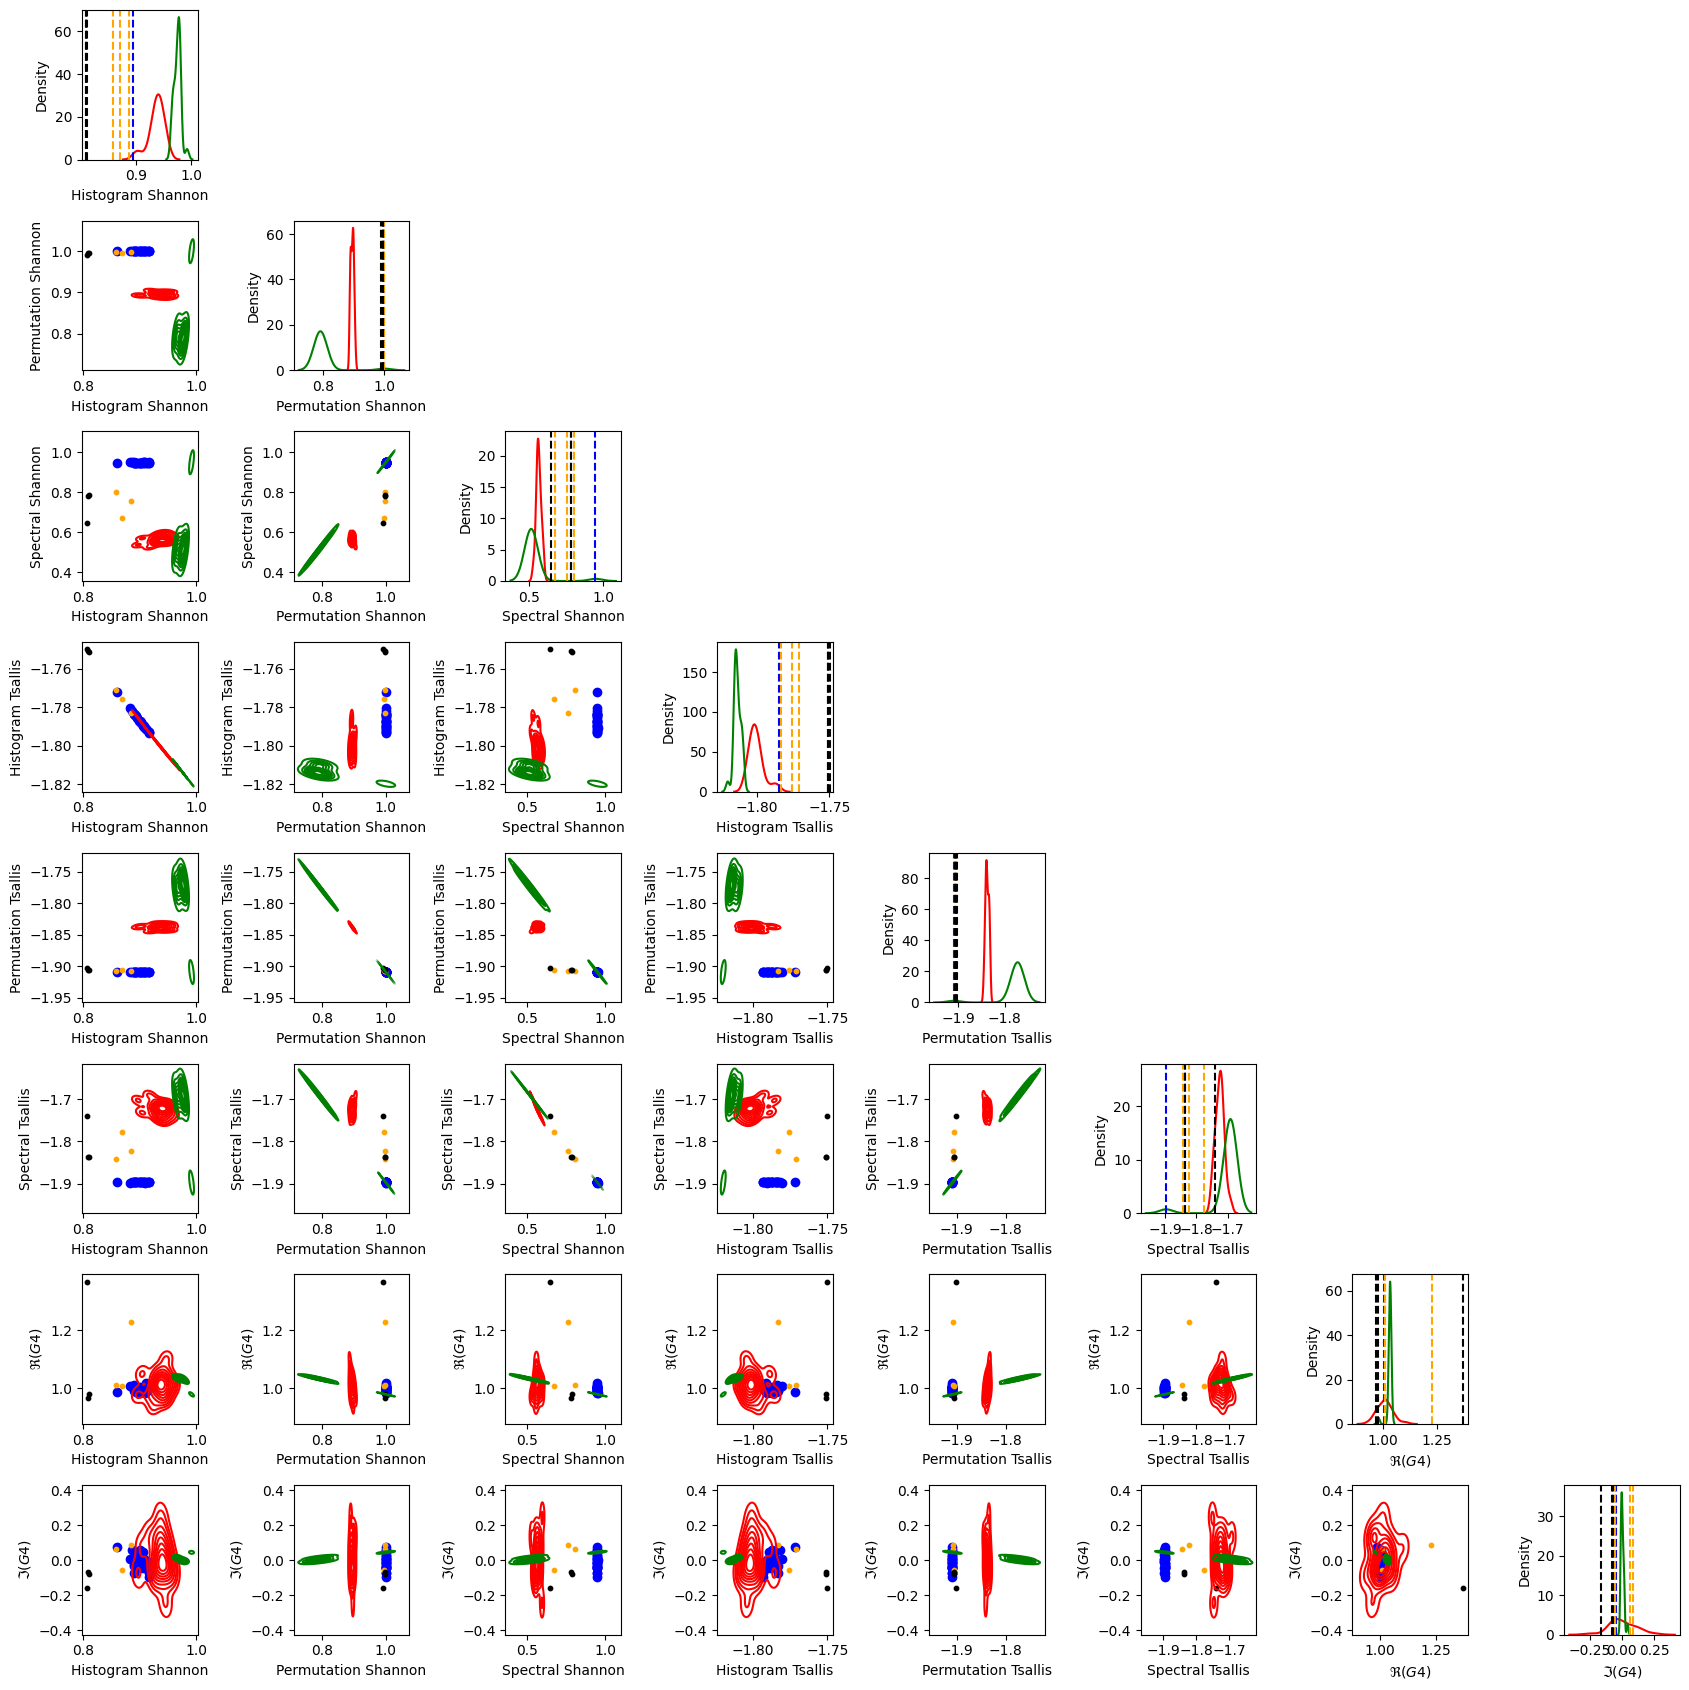

In [ ]:
names = randomH.columns.values.copy()
gs = GridSpec(len(names),len(names))

plt.figure(figsize=(17,17))
for j in range(len(names)):
  for i in range( j, len(names)):
      plt.subplot(gs[i,j])
      if i==j:
        sns.kdeplot(turbH[names[i]],color='red')
        #sns.kdeplot(redNoiseH[names[i]],color='red')
        sns.kdeplot(cglH[names[i]],color='green')
        plt.axvline(randomH[names[i]].iloc[0],color='b',ls='--')
        for k in range(len(cameliaH)):
          plt.axvline(cameliaH[names[i]].iloc[k],color='orange',ls='--')
        for k in range(len(cameliaH)):
          plt.axvline(plutoH[names[i]].iloc[k],color='k',ls='--')
        plt.xlabel(names[i].replace('_', ' ').replace('Powerlaw',''))
      else:
        plt.scatter(randomH[names[j]],randomH[names[i]],color='b')
        sns.kdeplot(turbH[[names[i],names[j]]],x=names[j],y=names[i],color='red')
        #sns.kdeplot(redNoiseH[[names[i],names[j]]],x=names[j],y=names[i],color='red')
        sns.kdeplot(cglH[[names[i],names[j]]],x=names[j],y=names[i],color='green')
        plt.scatter(cameliaH[names[j]],cameliaH[names[i]],color='orange',s=10)
        plt.scatter(plutoH[names[j]],plutoH[names[i]],color='k',s=10)
        plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw',''))
        plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw',''))
        #plt.scatter(randomH[names[i]],randomH[names[j]],color='b')
        #plt.scatter(turbH[names[i]],turbH[names[j]],color='r')
        #plt.scatter(cglH[names[i]],cglH[names[j]],color='orange)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import metrics
from scipy.stats import pearsonr

clusterName = []
silh = []
ij = []
for j in range(len(names)):
  for i in range( j+1, len(names)):
    m1 = cglH[[names[i],names[j]]].sample(25)
    m3 = randomH[[names[i],names[j]]].sample(25)
    m4 = redNoiseH[[names[i],names[j]]].sample(25)
    m1["class"] = 1
    m3["class"] = 2
    m4["class"] = 3
    m = pd.concat([m1,m3,m4])
    sc = metrics.silhouette_score(m[[names[i],names[j]]], m["class"], metric='euclidean')
    corr,p= pearsonr(m[names[i]], m[names[j]])
    corr = 1-np.abs(corr)
    silh.append(np.round(corr*sc,5))
    clusterName.append( names[i]+" x "+names[j])
    ij.append([i,j])
seq = np.argsort(silh)
for i in seq:
  print(clusterName[i], silh[i],ij[i])

Permutation_PowerlawTsallis x Permutation_Shannon 6e-05 [4, 1]
Histogram_PowerlawTsallis x Histogram_Shannon 0.00019 [3, 0]
Spectral_PowerlawTsallis x Spectral_Shannon 0.02098 [5, 2]
Permutation_PowerlawTsallis x Histogram_Shannon 0.06381 [4, 0]
Permutation_Shannon x Histogram_Shannon 0.0652 [1, 0]
Permutation_PowerlawTsallis x Histogram_PowerlawTsallis 0.07432 [4, 3]
Histogram_PowerlawTsallis x Permutation_Shannon 0.07703 [3, 1]
$\Re_(G4)$ x Spectral_Shannon 0.08879 [6, 2]
$\Re_(G4)$ x Spectral_PowerlawTsallis 0.11886 [6, 5]
$\Im_(G4)$ x Histogram_PowerlawTsallis 0.12283 [7, 3]
$\Im_(G4)$ x $\Re_(G4)$ 0.13485 [7, 6]
Histogram_PowerlawTsallis x Spectral_Shannon 0.19811 [3, 2]
$\Re_(G4)$ x Histogram_PowerlawTsallis 0.20186 [6, 3]
Spectral_Shannon x Histogram_Shannon 0.2393 [2, 0]
$\Re_(G4)$ x Histogram_Shannon 0.24032 [6, 0]
$\Im_(G4)$ x Permutation_PowerlawTsallis 0.25266 [7, 4]
$\Im_(G4)$ x Permutation_Shannon 0.25799 [7, 1]
$\Im_(G4)$ x Histogram_Shannon 0.30231 [7, 0]
$\Re_(G4)$ x P

In [ ]:
a = np.zeros((8,8))
for j in range(len(names)):
  for i in range( j+1, len(names)):
    m1 = cglH[[names[i],names[j]]].sample(25)
    m3 = randomH[[names[i],names[j]]].sample(25)
    m4 = redNoiseH[[names[i],names[j]]].sample(25)
    m1["class"] = 1
    m3["class"] = 2
    m4["class"] = 3
    m = pd.concat([m1,m3,m4])
    sc = metrics.silhouette_score(m[[names[i],names[j]]], m["class"], metric='euclidean')
    corr,p= pearsonr(m[names[i]], m[names[j]])
    corr = 1-np.abs(corr)
    a[i,j] = corr*sc
    a[j,i] = corr*sc

In [ ]:
names

array(['Histogram_Shannon', 'Permutation_Shannon', 'Spectral_Shannon',
       'Histogram_PowerlawTsallis', 'Permutation_PowerlawTsallis',
       'Spectral_PowerlawTsallis', '$\\Re_(G4)$', '$\\Im_(G4)$'],
      dtype=object)

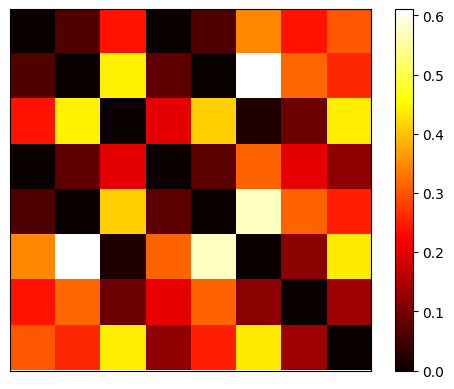

In [ ]:
plt.figure(figsize=(5,4))
plt.imshow(a,cmap = 'hot')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.tight_layout()
plt.show()

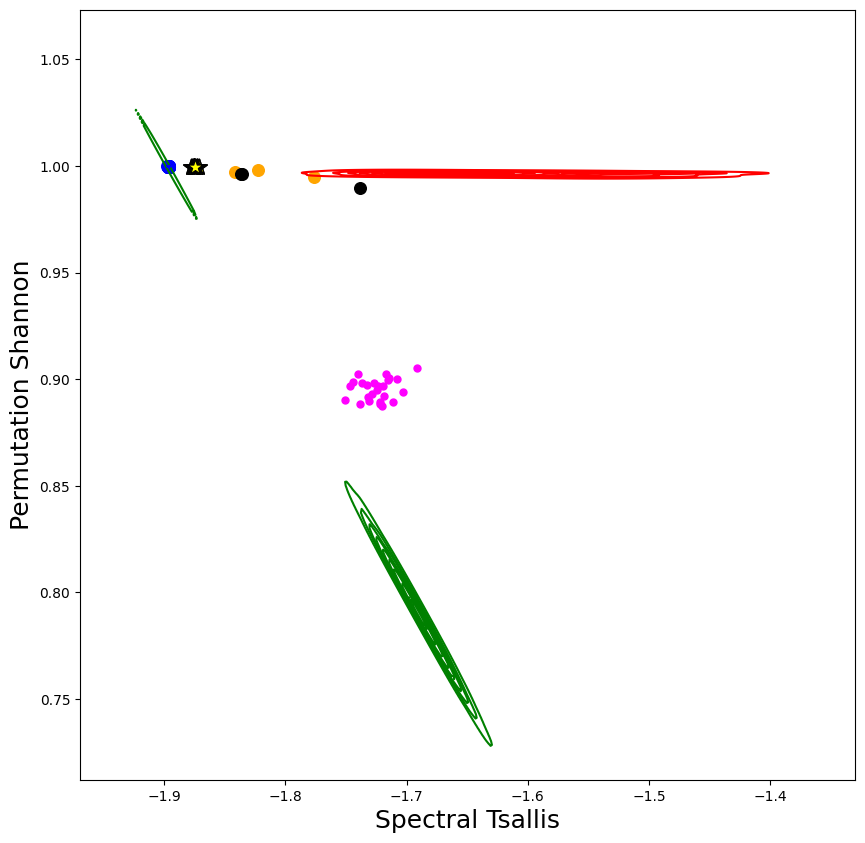

In [ ]:
i=1
j=5
plt.figure(figsize=(10,10))
plt.scatter(randomH[names[j]],randomH[names[i]],color='b',s=70)
plt.scatter(turbH[names[j]],turbH[names[i]],color='magenta',s=25)
sns.kdeplot(redNoiseH[[names[i],names[j]]],x=names[j],y=names[i],color='red')
sns.kdeplot(cglH[[names[i],names[j]]],x=names[j],y=names[i],color='green')
plt.scatter(cameliaH[names[j]],cameliaH[names[i]],color='orange',s=70)
sns.kdeplot(randomH[[names[i],names[j]]],x=names[j],y=names[i],color='b')
plt.scatter(plutoH[names[j]],plutoH[names[i]],color='k',s=70)
plt.scatter(mil[names[j]],mil[names[i]],color='yellow',edgecolors='k',s=140,marker='*')

plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw',''),fontsize=18)
plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw',''),fontsize=18)
plt.show()